In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("../data/data.csv")

In [6]:
data.columns

Index(['player_id', 'first_name', 'last_name', 'team', 'opponent', 'season',
       'week', 'completions', 'attempts', 'passing_yards', 'passing_tds',
       'interceptions', 'sack_fumbles_lost', 'passing_air_yards',
       'passing_yards_after_catch', 'passing_first_downs', 'passing_epa',
       'passing_2pt_conversions', 'dakota', 'carries', 'rushing_yards',
       'rushing_tds', 'rushing_fumbles', 'rushing_fumbles_lost',
       'rushing_first_downs', 'rushing_epa', 'rushing_2pt_conversions',
       'receptions', 'targets', 'receiving_yards', 'receiving_tds',
       'receiving_fumbles', 'receiving_fumbles_lost', 'receiving_air_yards',
       'receiving_yards_after_catch', 'receiving_first_downs', 'receiving_epa',
       'receiving_2pt_conversions', 'fantasy_points', 'fantasy_points_ppr',
       'height', 'years_exp', 'rookie_year', 'offense_snaps', 'offense_pct',
       'division_matchup', 'conference_matchup', 'team_AFC', 'team_NFC',
       'opponent_AFC', 'opponent_NFC', 'team_AFC 

In [9]:
plt.figure(figsize=(10,10))


<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

/Users/zachbloss/.pyenv/versions/3.9.10/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribution of Fantasy Points'}, xlabel='fantasy_points', ylabel='Density'>

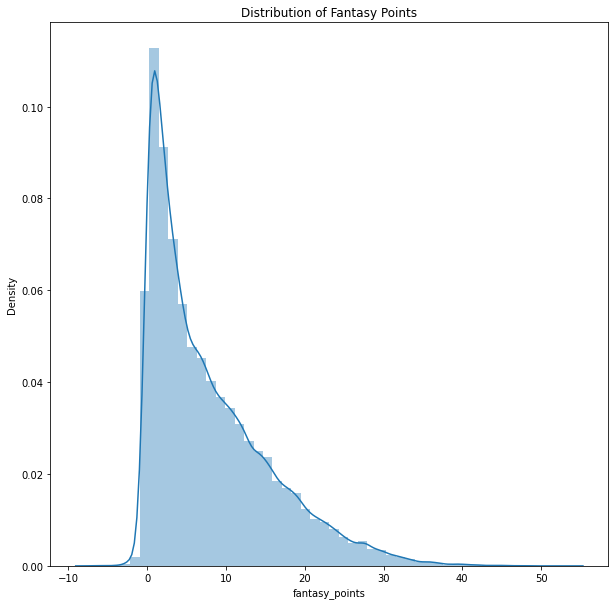

In [12]:
plt.figure(figsize=(10,10))
plt.title('Distribution of Fantasy Points')
sns.distplot(data['fantasy_points'])